In [1]:
import nbsetup
import numpy as np
import seaborn as sns
import pandas as pd
from models.galaxy import Galaxy
from models.space import Space

http://burro.astr.cwru.edu/ArnoldMOND/ahnoldmond.html

You cannot simulate MOND, as per explained above. We're checking numercially below that you can point simulate using my formula.

TLDR; you can.

In [18]:
dfs = []
for space_points in range(1000,5000,1000):
    nbsetup.cp(space_points)
    mass = 100000
    radius = 10
    calc_points = 40
    scale = radius*2/space_points
    picut = 1
    
    dims = (1,space_points,space_points)
    space = Space(dims, scale)
    r,z = space.rz()
    masses = np.zeros(dims)
    masses[r < radius/np.pi] = mass*(scale**2)
    galaxy = Galaxy([masses,], space)
    point_list = galaxy.radius_points(space.radius, points=calc_points)
    galaxy.analyse(point_list)
    df = galaxy.dataframe(mass_ratios=False)
    df['scale'] = scale
    dfs.append(df)
    nbsetup.cp('')

data = pd.concat(dfs, ignore_index=True)

# add approximate gravity adjustment
data['calc'] = data['x_vec']/(1+(data['x_abs']-data['x_vec'])**0.15)

data

,z,y,x,component,z_vec,y_vec,x_vec,z_abs,y_abs,x_abs,F_vec,F_abs,zd,rd,scale,calc
0,0,500,500,mass 0,0.0,-1.760245e-17,2.393979e-17,0.0,9.208748,9.208748,2.971463e-17,13.023137,0.0,0.00,0.0,9.994986e-18
1,0,500,512,mass 0,0.0,-1.227282e-16,1.020809e-01,0.0,9.203843,9.203856,1.020809e-01,13.016209,0.0,0.24,0.0,4.266284e-02
2,0,500,524,mass 0,0.0,9.593334e-16,2.054858e-01,0.0,9.188957,9.188991,2.054858e-01,12.995172,0.0,0.48,0.0,8.597709e-02
3,0,500,536,mass 0,0.0,-1.809140e-16,3.116366e-01,0.0,9.163560,9.163629,3.116366e-01,12.959280,0.0,0.72,0.0,1.305593e-01
4,0,500,548,mass 0,0.0,6.899181e-16,4.221694e-01,0.0,9.126698,9.126814,4.221694e-01,12.907183,0.0,0.96,0.0,1.771255e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,500,920,mass 0,0.0,-4.278373e-18,2.041343e-01,0.0,0.033859,0.204134,2.041343e-01,0.206923,0.0,8.40,0.5,2.041343e-01
76,0,500,932,mass 0,0.0,1.405751e-18,1.923079e-01,0.0,0.030950,0.192308,1.923079e-01,0.194783,0.0,8.64,0.5,1.923079e-01
77,0,500,944,mass 0,0.0,-2.215586e-18,1.814992e-01,0.0,0.028370,0.181499,1.814992e-01,0.183703,0.0,8.88,0.5,1.814992e-01
78,0,500,956,mass 0,0.0,-6.111961e-19,1.715926e-01,0.0,0.026073,0.171593,1.715926e-01,0.173562,0.0,9.12,0.5,1.715926e-01


## Converges like force

We can see the adjusted lines converge like normal force, but struggle around apex because of the point resolution as to be expected. This highlights the importance of more granularity in simulations but doesn't invalidate the simulation method. As at reasonable simulation scales, the error in the observed densities / masses has a far larger impact then the resolution of the simulation.

Here a smaller scale (lighter color) represents higher resolution.

<AxesSubplot:xlabel='rd', ylabel='x_vec'>

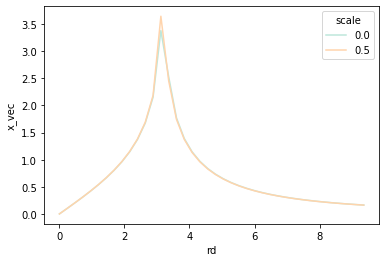

In [21]:
sns.lineplot(data=data, x='rd', y='x_vec', hue='scale', palette='icefire')

<AxesSubplot:xlabel='rd', ylabel='calc'>

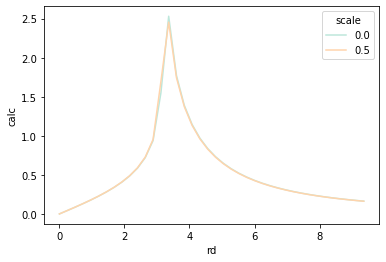

In [22]:
sns.lineplot(data=data, x='rd', y='calc', hue='scale', palette='icefire')

## Follows outside normal

We see the adjusted blue line follows the standard newtonian force red line outside of the disk. While inside it drops off slightly quicker.

<AxesSubplot:xlabel='rd', ylabel='x_vec'>

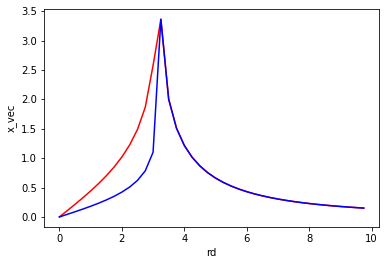

In [136]:
last = data.query('scale==%s' % scale)
sns.lineplot(data=last, x='rd', y='x_vec', color='red')
sns.lineplot(data=last, x='rd', y='calc', color='blue')

<AxesSubplot:>

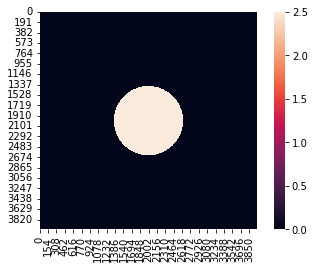

In [138]:
# shape of most refined disk in space
sns.heatmap(data=galaxy.mass_components[0][0], square=True)